In [1]:
import pandas as pd
import numpy as np

# Plotting Libraries
import matplotlib.pyplot as plt1
import pylab as plt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder

In [2]:
df1_telecom = pd.read_csv('telecom_costumers.csv')
df1_telecom

,region,tenure,age,income,marital,address zone,ed,employ,retire,gender,reside,custcat
0,2.0,13,44.0,64.0,Married,Zone 9,4.0,5,No,Male,2.0,A
1,3.0,11,33.0,136.0,Married,Zone 7,5.0,5,No,Male,6.0,D
2,3.0,68,52.0,116.0,Married,Zone 24,1.0,29,No,Female,2.0,C
3,2.0,33,33.0,33.0,Single,Zone 12,2.0,0,No,Female,1.0,A
4,2.0,23,30.0,30.0,Married,Zone 9,1.0,2,No,Male,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,10,39.0,27.0,Single,Zone 0,3.0,0,No,Female,3.0,A
996,1.0,7,34.0,22.0,Single,Zone 2,5.0,5,No,Female,1.0,A
997,3.0,67,59.0,944.0,Single,Zone 40,5.0,33,No,Female,1.0,D
998,3.0,70,49.0,87.0,Single,Zone 18,2.0,22,No,Female,1.0,C


In [3]:
df1_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        969 non-null    float64
 1   tenure        1000 non-null   int64  
 2   age           983 non-null    float64
 3   income        976 non-null    float64
 4   marital       1000 non-null   object 
 5   address zone  1000 non-null   object 
 6   ed            977 non-null    float64
 7   employ        1000 non-null   int64  
 8   retire        966 non-null    object 
 9   gender        1000 non-null   object 
 10  reside        969 non-null    float64
 11  custcat       1000 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 93.9+ KB


From above we can see that there are total 1000 rows and 12 columns in the dataset.

In [4]:
df1_telecom.describe()

,region,tenure,age,income,ed,employ,reside
count,969.000000,1000.000000,983.000000,976.000000,977.000000,1000.000000,969.000000
mean,2.027864,90.361000,41.623601,76.252049,2.670420,10.987000,2.324045
std,0.818338,224.474202,12.534544,103.897820,1.223018,10.082087,1.430284
min,1.000000,1.000000,18.000000,9.000000,1.000000,0.000000,1.000000
25%,1.000000,17.750000,32.000000,29.000000,2.000000,3.000000,1.000000
50%,2.000000,36.000000,40.000000,47.000000,3.000000,8.000000,2.000000
75%,3.000000,58.000000,51.000000,83.000000,4.000000,17.000000,3.000000
max,3.000000,999.000000,77.000000,1668.000000,5.000000,47.000000,8.000000


From above we see the descriptive statistics of all the numeric features.

Now we will find if there are any null values or any sentinal values present in the dataset. If we find any sentinal values, we can replace them with np.nan in that case.

### Checking null values in the dataset

In [5]:
df1_telecom.isnull().sum()

region          31
tenure           0
age             17
income          24
marital          0
address zone     0
ed              23
employ           0
retire          34
gender           0
reside          31
custcat          0
dtype: int64

Thus we see here that there are null values present in columns, region, age, income, ed, retire and reside.

### Checking Unique values in all the columns

In [6]:
def check_unique_vals(dataset):
    cols_dict = {}
    for col in dataset.columns:
        cols_dict[col] = list(dataset[col].unique())
    return cols_dict

In [7]:
check_unique_vals(df1_telecom)

{'region': [2.0, 3.0, 1.0, nan],
 'tenure': [13,
  11,
  68,
  33,
  23,
  41,
  45,
  38,
  999,
  5,
  7,
  57,
  9,
  29,
  60,
  34,
  1,
  26,
  53,
  55,
  14,
  42,
  25,
  56,
  71,
  35,
  20,
  54,
  44,
  72,
  10,
  15,
  27,
  64,
  65,
  49,
  47,
  30,
  52,
  36,
  58,
  69,
  28,
  16,
  3,
  48,
  8,
  40,
  67,
  2,
  31,
  62,
  4,
  17,
  43,
  12,
  61,
  59,
  51,
  19,
  22,
  70,
  50,
  6,
  46,
  39,
  24,
  21,
  18,
  63,
  37,
  66,
  32],
 'age': [44.0,
  33.0,
  52.0,
  30.0,
  39.0,
  22.0,
  35.0,
  59.0,
  nan,
  38.0,
  54.0,
  46.0,
  57.0,
  48.0,
  24.0,
  29.0,
  43.0,
  21.0,
  37.0,
  53.0,
  50.0,
  27.0,
  60.0,
  41.0,
  28.0,
  36.0,
  51.0,
  34.0,
  26.0,
  45.0,
  62.0,
  40.0,
  55.0,
  47.0,
  67.0,
  42.0,
  71.0,
  68.0,
  31.0,
  61.0,
  20.0,
  25.0,
  58.0,
  32.0,
  23.0,
  64.0,
  56.0,
  63.0,
  69.0,
  65.0,
  66.0,
  19.0,
  76.0,
  70.0,
  49.0,
  75.0,
  72.0,
  74.0,
  77.0,
  18.0,
  73.0],
 'income': [64.0,
  136.0,
  11

From the above analysis we see that there are null values present in the dataset. Sentinal Values are also present in the dataset like in column Tenure value '999' is present and in column Marriage value 'Unknown' is present. We will now replace these values with np.nan. 

### Replacing sentinal values with np.nan

In [8]:
df1_telecom = df1_telecom.fillna(value = np.nan)
df1_telecom['tenure']=df1_telecom['tenure'].replace({999:np.nan})
df1_telecom['marital']=df1_telecom['marital'].replace({'Unknown':np.nan})

We will check for the null values again

In [9]:
df1_telecom.isnull().sum()

region          31
tenure          57
age             17
income          24
marital         66
address zone     0
ed              23
employ           0
retire          34
gender           0
reside          31
custcat          0
dtype: int64

In [10]:
df1_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        969 non-null    float64
 1   tenure        943 non-null    float64
 2   age           983 non-null    float64
 3   income        976 non-null    float64
 4   marital       934 non-null    object 
 5   address zone  1000 non-null   object 
 6   ed            977 non-null    float64
 7   employ        1000 non-null   int64  
 8   retire        966 non-null    object 
 9   gender        1000 non-null   object 
 10  reside        969 non-null    float64
 11  custcat       1000 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 93.9+ KB


The number of null values have now increased.

### Replacing null values in numerical columns with median

We will now replace the np.nan values in the numerical columns with the median values of that column

In [11]:
def replace_num_nan(dataset):
    cols = ['region','tenure','age','income','ed','reside']
    for i in cols:
        dataset[i] = dataset[i].fillna(dataset[i].median())
    return dataset

In [12]:
df1_telecom = replace_num_nan(df1_telecom)

In [13]:
df1_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        1000 non-null   float64
 1   tenure        1000 non-null   float64
 2   age           1000 non-null   float64
 3   income        1000 non-null   float64
 4   marital       934 non-null    object 
 5   address zone  1000 non-null   object 
 6   ed            1000 non-null   float64
 7   employ        1000 non-null   int64  
 8   retire        966 non-null    object 
 9   gender        1000 non-null   object 
 10  reside        1000 non-null   float64
 11  custcat       1000 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 93.9+ KB


Now we have replaced all the null values in the numerical features with their median value.

### Replacing null values in categorical columns with mode

In [14]:
def replace_cat_nan(dataset):
        cols_cat = ['marital','retire']
        for i in cols_cat:
            dataset[i] = dataset[i].fillna(dataset[i].mode().unique().tolist()[0])
        return dataset

In [15]:
df1_telecom = replace_cat_nan(df1_telecom)

In [16]:
df1_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        1000 non-null   float64
 1   tenure        1000 non-null   float64
 2   age           1000 non-null   float64
 3   income        1000 non-null   float64
 4   marital       1000 non-null   object 
 5   address zone  1000 non-null   object 
 6   ed            1000 non-null   float64
 7   employ        1000 non-null   int64  
 8   retire        1000 non-null   object 
 9   gender        1000 non-null   object 
 10  reside        1000 non-null   float64
 11  custcat       1000 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 93.9+ KB


Now we have replaced all the null values in the categorical features with their mode value.

## Exploratory Data Analysis

### 1. Heat Map

<AxesSubplot:>

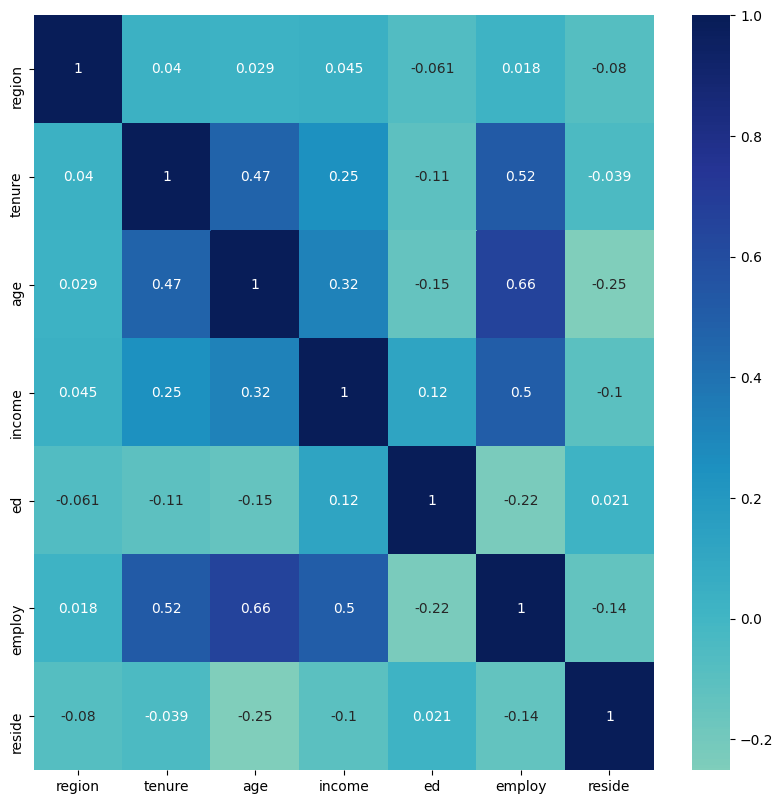

In [17]:
#heatmap
corrmat = plt.figure(figsize=(10,10),dpi=100)
sns.heatmap(df1_telecom.corr(),cmap='YlGnBu',annot=True,center=0)

### 2. Data Distribution

We will plot the distribution for all the numerical variables

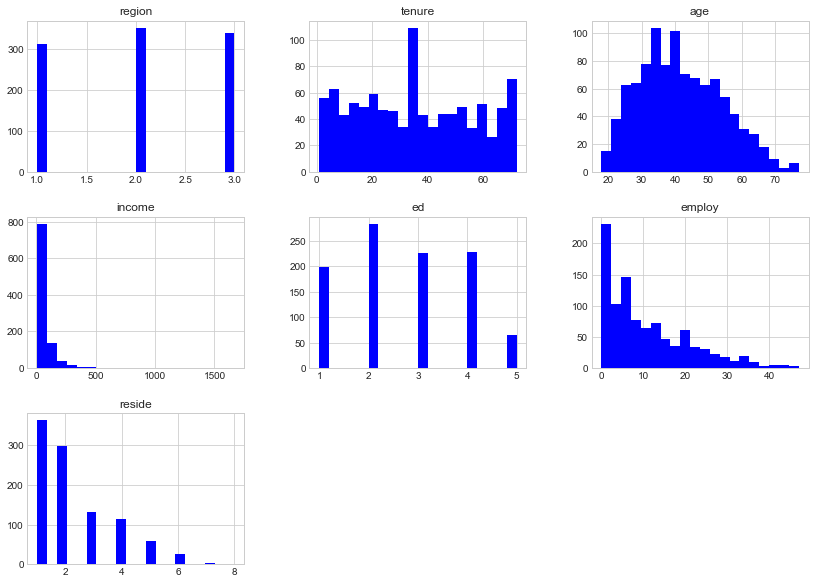

In [18]:
import matplotlib.pyplot as plt # plotting

plt.style.use('seaborn-whitegrid')


df1_telecom.hist(bins=20, figsize=(14,10), color='blue')
plt.show()

From above analysis, we see that there is skewness in column 'income', 'employ' and 'reside'.

<AxesSubplot:title={'center':'Custcat Counts'}>

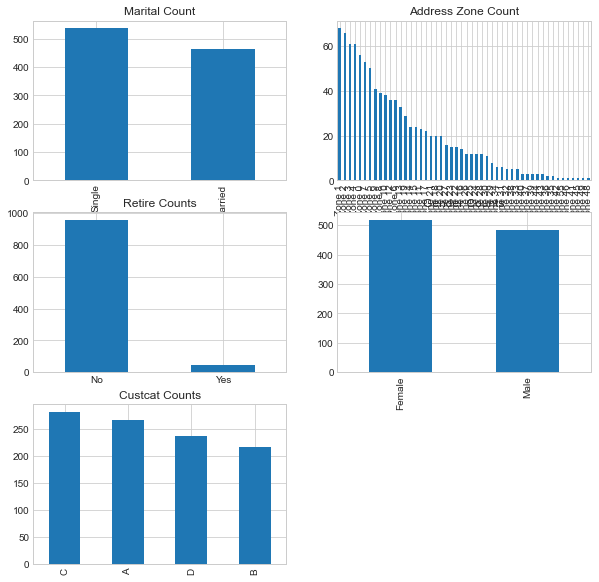

In [19]:
# Set up a grid of plots
fig = plt.figure(figsize=(10,10))
fig_dims = (3, 2)

# Plotting marital counts
plt.subplot2grid(fig_dims, (0, 0))
df1_telecom['marital'].value_counts().plot(kind='bar', 
                                         title='Marital Count')

# Plot address zone counts
plt.subplot2grid(fig_dims, (0, 1))
df1_telecom['address zone'].value_counts().plot(kind='bar', 
                                       title='Address Zone Count')

# Plot retire counts
plt.subplot2grid(fig_dims, (1, 0))
df1_telecom['retire'].value_counts().plot(kind='bar', 
                                    title='Retire Counts')
plt.xticks(rotation=0)

# Plot Gender counts
plt.subplot2grid(fig_dims, (1, 1))
df1_telecom['gender'].value_counts().plot(kind='bar', 
                                         title='Gender Counts')

# Plot custcat counts
plt.subplot2grid(fig_dims, (2, 0))
df1_telecom['custcat'].value_counts().plot(kind='bar', 
                                         title='Custcat Counts')


From the above analysis we see that there is skewness in the data. For 'retire'column there are a lot of rows with 'No' and very less values with 'Yes'. 

c:\users\aditi\documents\aditi\utd\5th semester courses (spring 2021)\mis 6341 applied machine learning\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


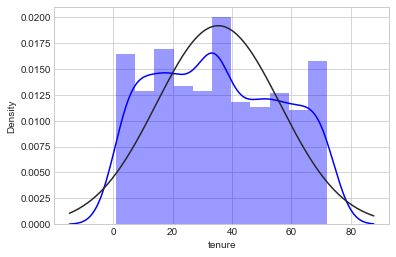

c:\users\aditi\documents\aditi\utd\5th semester courses (spring 2021)\mis 6341 applied machine learning\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


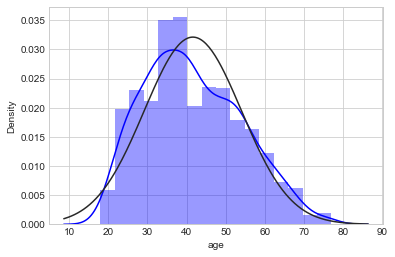

c:\users\aditi\documents\aditi\utd\5th semester courses (spring 2021)\mis 6341 applied machine learning\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


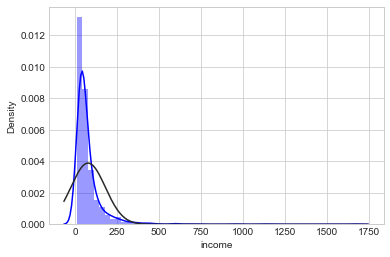

c:\users\aditi\documents\aditi\utd\5th semester courses (spring 2021)\mis 6341 applied machine learning\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


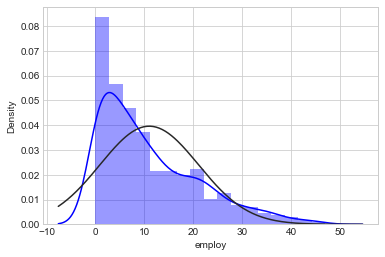

c:\users\aditi\documents\aditi\utd\5th semester courses (spring 2021)\mis 6341 applied machine learning\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


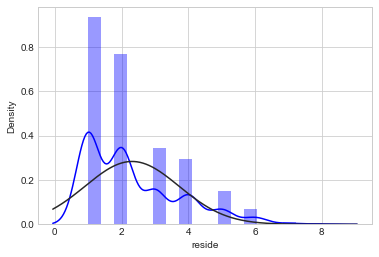

In [20]:
for col in ['tenure','age','income', 'employ', 'reside']:
    fig = plt.figure(figsize = (6,4))
    sns.distplot(df1_telecom[col], fit=norm, color='blue');
    plt.xlabel(col)
    plt.show()

We see that the overall data is skewed.

### Analyzing the target column

c:\users\aditi\documents\aditi\utd\5th semester courses (spring 2021)\mis 6341 applied machine learning\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='custcat', ylabel='count'>

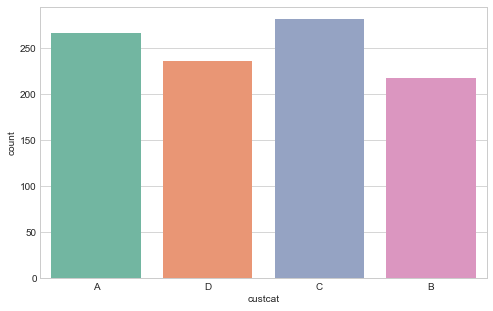

In [21]:
data_dist_y = plt.figure(figsize=(8,5))
sns.countplot(df1_telecom['custcat'], palette='Set2')

We also see that the target column data is not imbalanced.

## Encoding variables

In [22]:
df1_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        1000 non-null   float64
 1   tenure        1000 non-null   float64
 2   age           1000 non-null   float64
 3   income        1000 non-null   float64
 4   marital       1000 non-null   object 
 5   address zone  1000 non-null   object 
 6   ed            1000 non-null   float64
 7   employ        1000 non-null   int64  
 8   retire        1000 non-null   object 
 9   gender        1000 non-null   object 
 10  reside        1000 non-null   float64
 11  custcat       1000 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 93.9+ KB


### 1. Column marital

In [23]:
# checking unique values in column marital
df1_telecom['marital'].unique()

array(['Married', 'Single'], dtype=object)

In [24]:
# checking the value count for column marital
df1_telecom['marital'].value_counts()

Single     537
Married    463
Name: marital, dtype: int64

Thus to encode this variable we can see that value Single has the maximum count so we can map Single with 1 and Married with 0.

In [25]:
df1_telecom['marital'] = df1_telecom['marital'].map({'Single':1, 'Married':0})

In [26]:
# checking the value count for column marital
df1_telecom['marital'].value_counts()

1    537
0    463
Name: marital, dtype: int64

### 2. Column address zone

In [27]:
# checking unique values in column address zone
df1_telecom['address zone'].unique()

array(['Zone 9', 'Zone 7', 'Zone 24', 'Zone 12', 'Zone 17', 'Zone 2',
       'Zone 5', 'Zone 21', 'Zone 10', 'Zone 14', 'Zone 8', 'Zone 30',
       'Zone 3', 'Zone 38', 'Zone 19', 'Zone 18', 'Zone 0', 'Zone 11',
       'Zone 1', 'Zone 6', 'Zone 27', 'Zone 26', 'Zone 13', 'Zone 34',
       'Zone 4', 'Zone 20', 'Zone 28', 'Zone 36', 'Zone 16', 'Zone 15',
       'Zone 22', 'Zone 44', 'Zone 29', 'Zone 23', 'Zone 31', 'Zone 25',
       'Zone 49', 'Zone 41', 'Zone 39', 'Zone 43', 'Zone 33', 'Zone 32',
       'Zone 35', 'Zone 40', 'Zone 37', 'Zone 45', 'Zone 48', 'Zone 42',
       'Zone 46', 'Zone 55'], dtype=object)

In [28]:
# checking the value count for column address zone
df1_telecom['address zone'].value_counts()

Zone 1     68
Zone 2     66
Zone 3     61
Zone 4     61
Zone 0     56
Zone 7     53
Zone 5     50
Zone 9     41
Zone 8     39
Zone 10    38
Zone 12    36
Zone 6     36
Zone 13    33
Zone 19    29
Zone 14    24
Zone 15    24
Zone 11    23
Zone 17    22
Zone 21    20
Zone 18    20
Zone 20    20
Zone 27    16
Zone 23    15
Zone 22    15
Zone 16    14
Zone 26    12
Zone 25    12
Zone 24    12
Zone 28    12
Zone 30    11
Zone 29     8
Zone 34     6
Zone 31     6
Zone 32     5
Zone 38     5
Zone 33     5
Zone 40     3
Zone 37     3
Zone 39     3
Zone 44     3
Zone 43     3
Zone 36     2
Zone 35     2
Zone 42     1
Zone 55     1
Zone 46     1
Zone 41     1
Zone 45     1
Zone 49     1
Zone 48     1
Name: address zone, dtype: int64

We cannot map these values as these are not ordinal. Therefore we will do one hot encoding for column address zone

In [29]:
# Applying one hot encoding
cols = pd.get_dummies(df1_telecom['address zone'], prefix = 'AddZone_')
df1_telecom[cols.columns] = cols

# dropping column address zone
df1_telecom.drop('address zone', axis = 1, inplace=True)
df1_telecom.head()

,region,tenure,age,income,marital,ed,employ,retire,gender,reside,...,AddZone__Zone 45,AddZone__Zone 46,AddZone__Zone 48,AddZone__Zone 49,AddZone__Zone 5,AddZone__Zone 55,AddZone__Zone 6,AddZone__Zone 7,AddZone__Zone 8,AddZone__Zone 9
0,2.0,13.0,44.0,64.0,0,4.0,5,No,Male,2.0,...,0,0,0,0,0,0,0,0,0,1
1,3.0,11.0,33.0,136.0,0,5.0,5,No,Male,6.0,...,0,0,0,0,0,0,0,1,0,0
2,3.0,68.0,52.0,116.0,0,1.0,29,No,Female,2.0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,33.0,33.0,33.0,1,2.0,0,No,Female,1.0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,23.0,30.0,30.0,0,1.0,2,No,Male,4.0,...,0,0,0,0,0,0,0,0,0,1


### 3. Column retire

In [30]:
# checking unique values in column retire
df1_telecom['retire'].unique()

array(['No', 'Yes'], dtype=object)

In [31]:
# checking the value count for column retire
df1_telecom['retire'].value_counts()

No     957
Yes     43
Name: retire, dtype: int64

Thus to encode this variable we can see that value No has the maximum count so we can map No with 1 and Yes with 0.

In [32]:
df1_telecom['retire'] = df1_telecom['retire'].map({'No':1, 'Yes':0})

In [33]:
# checking the value count for column retire
df1_telecom['retire'].value_counts()

1    957
0     43
Name: retire, dtype: int64

### 4. Column Gender

In [34]:
# checking unique values in column gender
df1_telecom['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [35]:
# checking the value count for column gender
df1_telecom['gender'].value_counts()

Female    517
Male      483
Name: gender, dtype: int64

Thus to encode this variable we can see that value Female has the maximum count so we can map Female with 1 and Male with 0.

In [36]:
df1_telecom['gender'] = df1_telecom['gender'].map({'Female':1, 'Male':0})

In [37]:
# checking the value count for column gender
df1_telecom['gender'].value_counts()

1    517
0    483
Name: gender, dtype: int64

### 5 . Column custcat

In [38]:
# checking unique values in cloumn custcat
df1_telecom['custcat'].unique()

array(['A', 'D', 'C', 'B'], dtype=object)

In [39]:
df_custcat = df1_telecom['custcat'].sort_values().unique()
df_custcat

array(['A', 'B', 'C', 'D'], dtype=object)

In [40]:
# creating a mapper dictionary
unique_custcat_values = df_custcat.tolist()
mapper_dict = {}
count = 0
for unique_value in unique_custcat_values:
    count = count + 1 
    mapper_dict.update({f'{unique_value}': count})

A
B
C
D


In [41]:
df1_telecom.replace({'custcat':mapper_dict}, inplace=True)

In [42]:
df1_telecom['custcat'].sort_values().unique()

array([1, 2, 3, 4], dtype=int64)

In [43]:
# checking the unique values in column custcat
df1_telecom['custcat'].unique()

array([1, 4, 3, 2], dtype=int64)

In [44]:
df1_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 61 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            1000 non-null   float64
 1   tenure            1000 non-null   float64
 2   age               1000 non-null   float64
 3   income            1000 non-null   float64
 4   marital           1000 non-null   int64  
 5   ed                1000 non-null   float64
 6   employ            1000 non-null   int64  
 7   retire            1000 non-null   int64  
 8   gender            1000 non-null   int64  
 9   reside            1000 non-null   float64
 10  custcat           1000 non-null   int64  
 11  AddZone__Zone 0   1000 non-null   uint8  
 12  AddZone__Zone 1   1000 non-null   uint8  
 13  AddZone__Zone 10  1000 non-null   uint8  
 14  AddZone__Zone 11  1000 non-null   uint8  
 15  AddZone__Zone 12  1000 non-null   uint8  
 16  AddZone__Zone 13  1000 non-null   uint8  
 

Now we see that we have encoded all the columns in the dataset.